In [6]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break

#     # Draw landmark annotation on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         results.face_landmarks,
#         mp_holistic.FACEMESH_CONTOURS,
#         landmark_drawing_spec=None,
#         connection_drawing_spec=mp_drawing_styles
#         .get_default_face_mesh_contours_style())
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
cap.release()

C:\Users\ayanb\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>


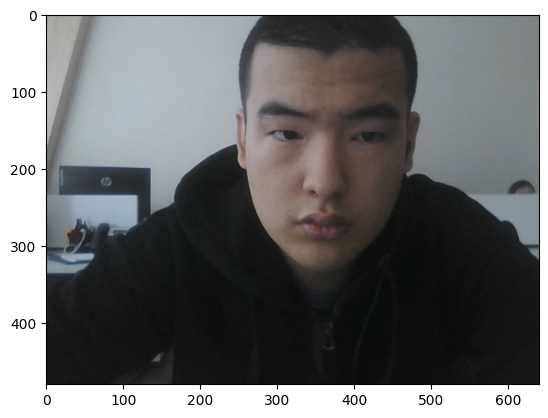

In [7]:
plt.imshow(image)

In [12]:
# Converting Mediapipe to DataFrame

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [9]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i,['x','y','z']] = [point.x, point.y, point.z]
if results.pose_landmarks:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i,['x','y','z']] = [point.x, point.y, point.z]
if results.left_hand_landmarks:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i,['x','y','z']] = [point.x, point.y, point.z]
if results.right_hand_landmarks:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i,['x','y','z']] = [point.x, point.y, point.z]

# landmarks['y'] = -landmarks['y']


In [14]:
# Create the kaggle type format from pur detected landmarks

<Axes: xlabel='x', ylabel='y'>

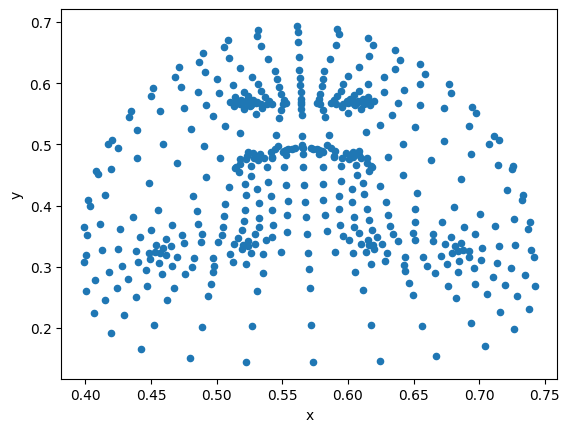

In [15]:
face.plot(x='x', y='y', kind='scatter')

In [16]:
landmarks = pd.DataFrame()

In [17]:
xyz

,frame,row_id,type,landmark_index,x,y,z
0,83,83-face-0,face,0,0.387253,0.381374,-0.051682
1,83,83-face-1,face,1,0.373218,0.342151,-0.070351
2,83,83-face-2,face,2,0.378215,0.357100,-0.043825
3,83,83-face-3,face,3,0.368546,0.311701,-0.041492
4,83,83-face-4,face,4,0.373314,0.330986,-0.071895
...,...,...,...,...,...,...,...
57010,187,187-right_hand-16,right_hand,16,NaN,NaN,NaN
57011,187,187-right_hand-17,right_hand,17,NaN,NaN,NaN
57012,187,187-right_hand-18,right_hand,18,NaN,NaN,NaN
57013,187,187-right_hand-19,right_hand,19,NaN,NaN,NaN


In [40]:
def create_frame_landmark_df(results, frame):
    xyz_skel = xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()
    # Initialize empty DataFrames
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()

    # Populate face landmarks
    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # Populate pose landmarks
    if results.pose_landmarks:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # Populate left-hand landmarks
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # Populate right-hand landmarks
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # Reset index and assign type for each DataFrame
    face = (face.reset_index()
            .rename(columns={'index': 'landmark_index'})
            .assign(type='face'))

    pose = (pose.reset_index()
            .rename(columns={'index': 'landmark_index'})
            .assign(type='pose'))

    left_hand = (left_hand.reset_index()
                 .rename(columns={'index': 'landmark_index'})
                 .assign(type='left_hand'))

    right_hand = (right_hand.reset_index()
                  .rename(columns={'index': 'landmark_index'})
                  .assign(type='right_hand'))

    # Concatenate all landmarks DataFrames
    landmarks = pd.concat([face, pose, left_hand, right_hand]).reset_index(drop=True)
    landmarks = xyz_skel.merge(landmarks, on=['type', 'landmark_index'], how='left')
    landmarks = landmarks.assign(frame=frame)
    return landmarks

In [42]:
train['sign'].value_counts

<bound method IndexOpsMixin.value_counts of 0          blow
1          wait
2         cloud
3          bird
4          owie
          ...  
94472     white
94473      have
94474    flower
94475      room
94476     happy
Name: sign, Length: 94477, dtype: object>

In [ ]:
# Create 'teacher'

In [10]:
# Data

In [11]:
train = pd.read_csv('./asl-signs/train.csv')
pq_file = './asl-signs/train_landmark_files/16069/10042041.parquet'
xyz = pd.read_parquet(pq_file)

In [12]:
xyz.query('frame == 83')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [13]:
train.query('sequence_id == 10042041')

,path,participant_id,sequence_id,sign
101,train_landmark_files/16069/10042041.parquet,16069,10042041,green


In [15]:
ROWS_PER_FRAME = 543 # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [17]:
xyz_np = load_relevant_data_subset(pq_file)

In [18]:
xyz_np.shape

(105, 543, 3)

NameError: name 'xyz' is not defined